In [47]:
import numpy as np
import os
import seaborn as sns
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
import acquire as acq
import prepare as prep
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
titanic_query = "select * from passengers"
directory = os.getcwd()

In [24]:
#prep
titanic_df = acq.get_titanic_data(titanic_query)
titanic_df['survived'] = titanic_df['survived'].astype(str) #should have dropped embark, and passenger_id so I didn't have to deal with it later
titanic_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [25]:
#clean my data
titanic_df = prep.prep_titanic(titanic_df)

titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [26]:
titanic_df = titanic_df.drop(['passenger_id', 'sex', 'embarked'], axis=1)
titanic_df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [27]:
#split my data
train, validate, test = prep.split_data(titanic_df, 'survived')

In [28]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [29]:
# inspect size
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

In [30]:
#calculate baseline accuracy
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

In [34]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['survived', 'pclass', 'sibsp', 'parch', 'alone', 'embarked_Q', 'embarked_S'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'pclass', 'sibsp', 'parch', 'alone', 'embarked_Q', 'embarked_S'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'pclass', 'sibsp', 'parch', 'alone', 'embarked_Q', 'embarked_S'])
y_test = test.survived

In [35]:
X_train.head()

,fare,sex_male
455,7.8958,1
380,227.5250,0
492,30.5000,1
55,35.5000,1
243,7.1250,1


In [14]:
target = 'survived'

In [15]:
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: object

In [36]:
# set to defaults
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [37]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred5 = knn5.predict(X_train)

In [39]:
#sneakpeek
y_pred5[:5]

array(['0', '1', '1', '0', '0'], dtype=object)

In [40]:
y_pred_proba5 = knn5.predict_proba(X_train)

In [41]:
y_pred_proba5[:5]

array([[0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ]])

In [42]:
knn5.classes_

array(['0', '1'], dtype=object)

In [43]:
y_pred5[:5]

array(['0', '1', '1', '0', '0'], dtype=object)

In [44]:
confusion_matrix(y_train, y_pred5)

array([[280,  49],
       [ 51, 154]])

In [45]:
pd.crosstab(y_train, y_pred5) #R:actual, C:predictions

col_0,0,1
survived,,
0,280,49
1,51,154


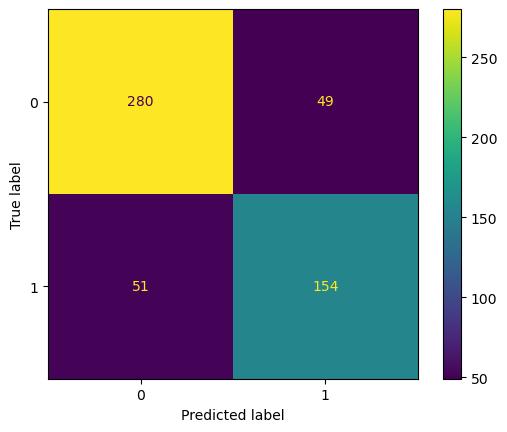

In [48]:
plot_confusion_matrix(knn5, X_train, y_train)

In [49]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.75      0.75       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [50]:
# MAKE THE THING: Create KNN Object
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# FIT THE THING: Fit object to training data
knn1.fit(X_train, y_train)

# USE  THE THING: Make predictions on training data
y_pred1 = knn1.predict(X_train)

In [52]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       329
           1       0.89      0.87      0.88       205

    accuracy                           0.91       534
   macro avg       0.90      0.90      0.90       534
weighted avg       0.91      0.91      0.91       534



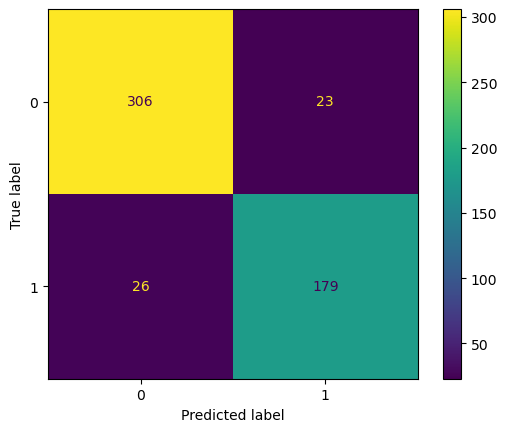

In [53]:
plot_confusion_matrix(knn1, X_train, y_train)

In [54]:
print(f"""Accuracy of KNN (k=1) classifier on validate set: {knn1.score(X_validate, y_validate):.2f}
     
Accuracy of KNN (k=5) classifier on validate set: {knn5.score(X_validate, y_validate):.2f}""")

Accuracy of KNN (k=1) classifier on validate set: 0.72
     
Accuracy of KNN (k=5) classifier on validate set: 0.76


In [55]:
#iteration

model_accuracies = {}

for i in range(1,10):
    #MAKE THE THING
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #FIT THE THING
    knn.fit(X_train, y_train)
    
    #USE THE THING
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(knn.score(X_train, y_train),2),
        'validate_score':round(knn.score(X_validate, y_validate),2)
    }

In [56]:
model_accuracies

{'1_neighbors': {'train_score': 0.91, 'validate_score': 0.72},
 '2_neighbors': {'train_score': 0.87, 'validate_score': 0.71},
 '3_neighbors': {'train_score': 0.85, 'validate_score': 0.75},
 '4_neighbors': {'train_score': 0.83, 'validate_score': 0.77},
 '5_neighbors': {'train_score': 0.81, 'validate_score': 0.76},
 '6_neighbors': {'train_score': 0.81, 'validate_score': 0.75},
 '7_neighbors': {'train_score': 0.81, 'validate_score': 0.77},
 '8_neighbors': {'train_score': 0.79, 'validate_score': 0.77},
 '9_neighbors': {'train_score': 0.8, 'validate_score': 0.76}}

In [57]:
pd.DataFrame(model_accuracies).T

,train_score,validate_score
1_neighbors,0.91,0.72
2_neighbors,0.87,0.71
3_neighbors,0.85,0.75
4_neighbors,0.83,0.77
5_neighbors,0.81,0.76
6_neighbors,0.81,0.75
7_neighbors,0.81,0.77
8_neighbors,0.79,0.77
9_neighbors,0.80,0.76


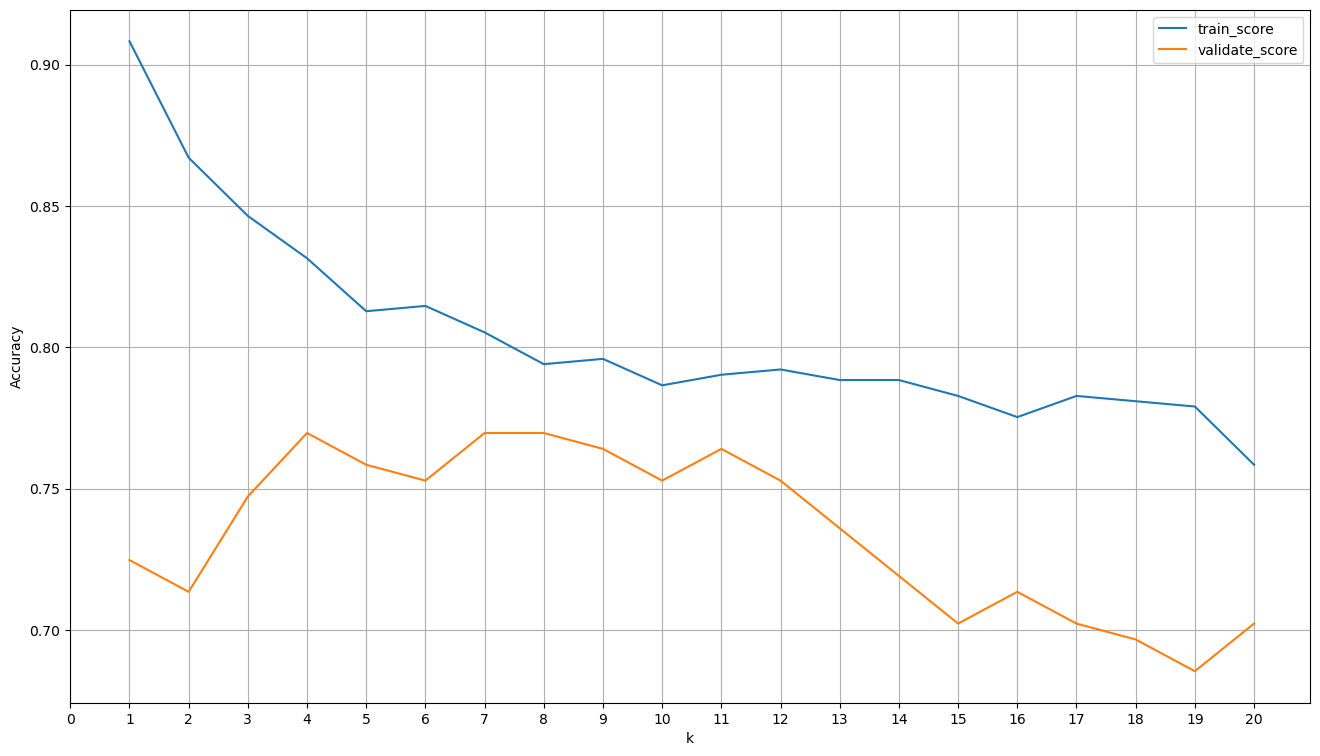

In [58]:
#VIZ

metrics = []

for k in range(1,21):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)
    
#conver to df
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

**Takeaways:

The best kneighbors feature value is 8 for the KNN Model. It will give us the most consistently accurate neighbor which we will now use on our test set below.